In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kicksharing.csv')

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [53]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [54]:
df.isna().sum()

,0
order_rk,0
party_rk,0
gender_cd,2921
age,0
education_level_cd,206690
marital_status_cd,179020
lvn_state_nm,34177
minute_cost,0
activation_cost,0
hold_amount,0


**Нахождение средних значений**

In [55]:
average_cost = df['nominal_price_rub_amt'].mean()
print(f"Средняя стоимость поездки: {average_cost:.2f} руб.")

Средняя стоимость поездки: 127.65 руб.


In [56]:
distances = df['distance_km'].values
mean_dist = sum(distances) / len(distances)

print(f"Среднее расстояние: {mean_dist:.1f} км.")

Среднее расстояние: 3.7 км.


In [57]:
age = df["age"].values
mean_age = sum(age) / len(age)

print(f"Средний возраст: {mean_age:.1f}")

Средний возраст: 31.5


In [58]:
start_time = pd.to_datetime(df["book_start_dttm"])
finish_time = pd.to_datetime(df["book_end_dttm"])

razn = finish_time - start_time
razn = razn.dt.total_seconds() / 60
print(f"Среднее время поездки: {(sum(razn.values) / len(razn)):.2f} мин.")

Среднее время поездки: 11.44 мин.


In [59]:
days_of_week = []

for i in df["book_end_dttm"].values:
  days_of_week.append(i[:10])


In [60]:
from datetime import datetime

week = []

for i in days_of_week:
  date_obj = datetime.strptime(i, '%Y-%m-%d').date()

  weekday_number = date_obj.weekday()

  weekday_name = date_obj.strftime('%A')

  week.append(weekday_name)


In [61]:
week = pd.Series({
    "Monday": week.count("Monday"),
    "Tuesday": week.count("Tuesday"),
    "Wednesday": week.count("Wednesday"),
    "Thursday": week.count("Thursday"),
    "Friday": week.count("Friday"),
    "Saturday": week.count("Saturday"),
    "Sunday": week.count("Sunday"),
})

# Анализ ключевых метрик

1. Распределение стоимости поездок

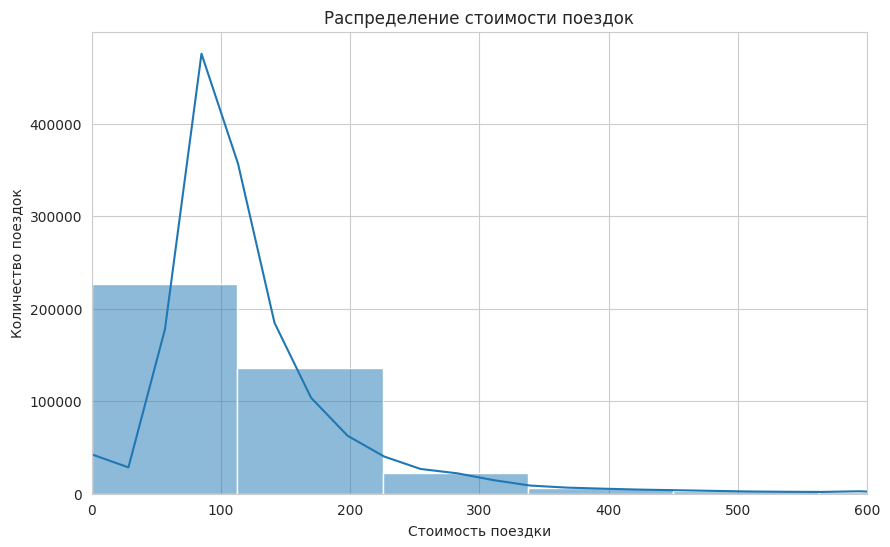

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(df['nominal_price_rub_amt'], bins=50, kde=True)
plt.title('Распределение стоимости поездок')
plt.xlabel('Стоимость поездки')
plt.ylabel('Количество поездок')
plt.xlim(0, 600)
plt.show()

2. Распределение длительности поездок

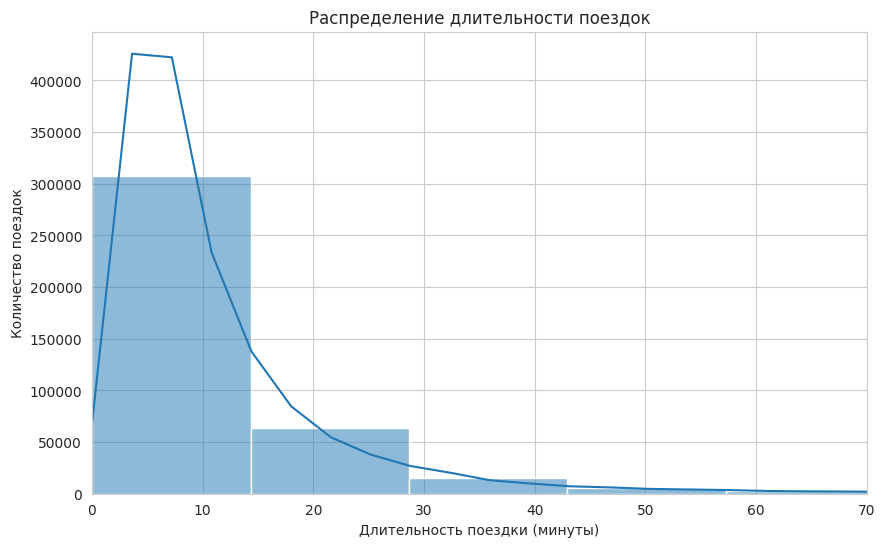

In [63]:
df['duration_min'] = (pd.to_datetime(df['book_end_dttm']) - pd.to_datetime(df['book_start_dttm'])).dt.total_seconds() / 60

plt.figure(figsize=(10,6))
sns.histplot(df['duration_min'], bins=50, kde=True)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поездки (минуты)')
plt.ylabel('Количество поездок')
plt.xlim(0, 70)
plt.show()

3. Распределение расстояний поездок

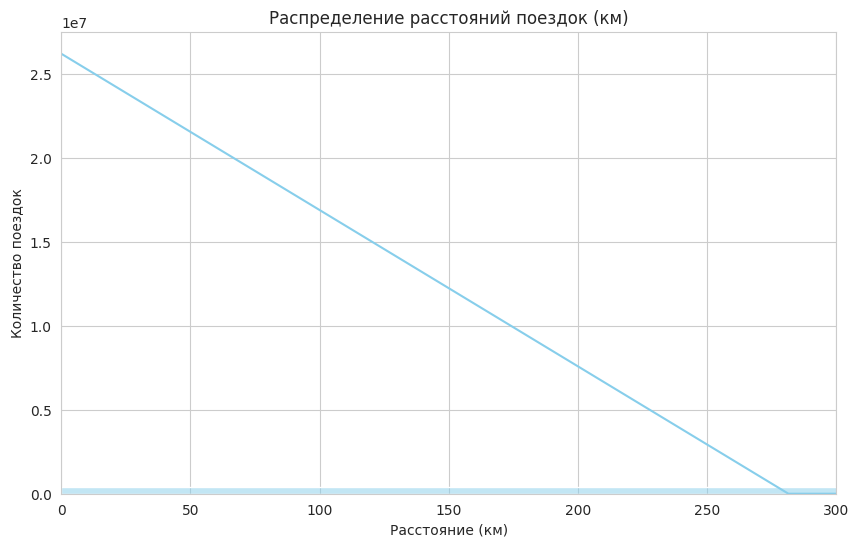

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_km'], bins=30, kde=True, color='skyblue')
plt.title('Распределение расстояний поездок (км)')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.xlim(0, 300)
plt.show()

In [65]:
f = df['distance_km'].values
print(len(f))

396749


4. Количество поездок по дням недели

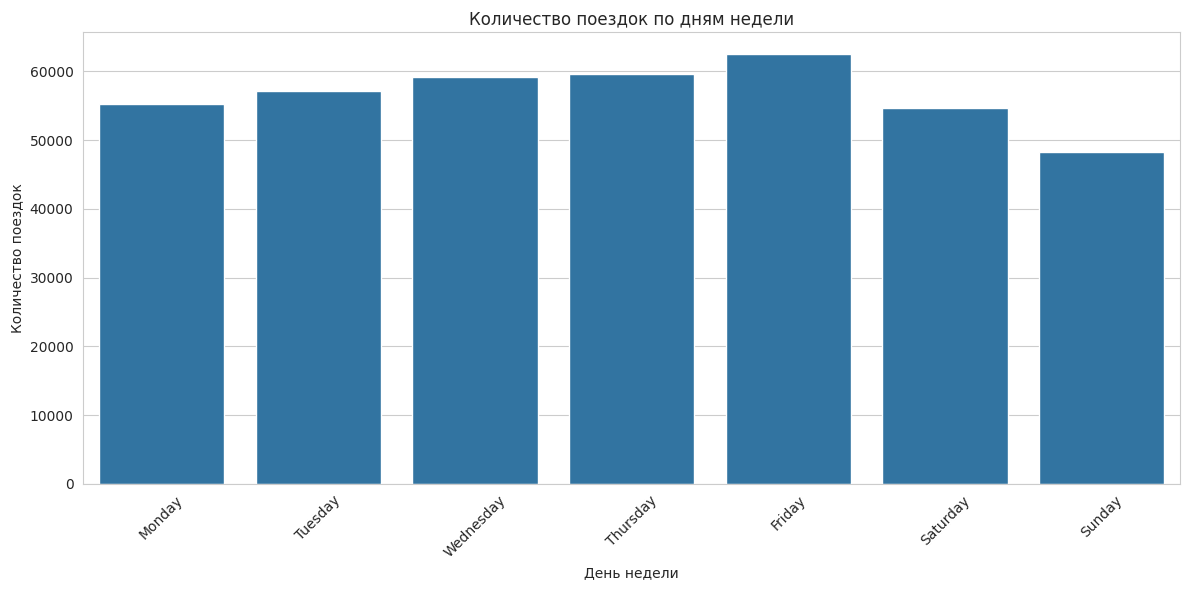

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x=week.index, y=week.values)
plt.title('Количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ по демографическим признакам

1. Распределение по возрасту

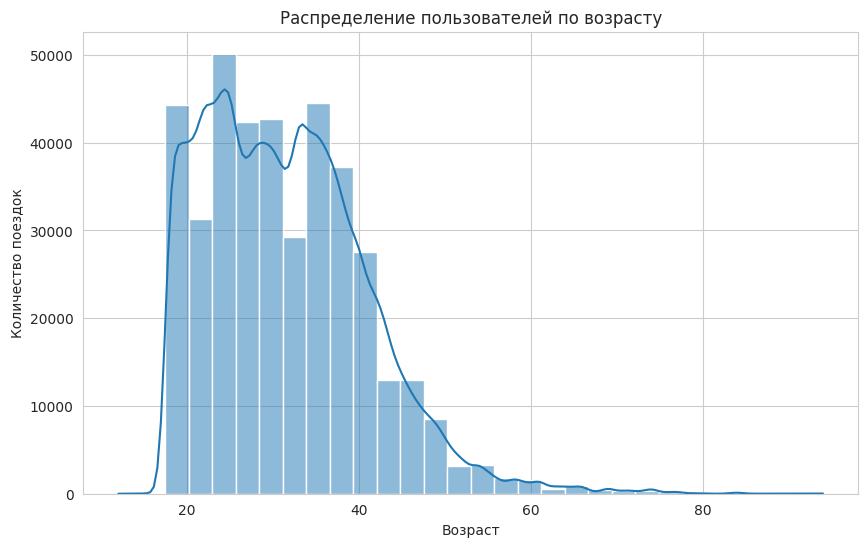

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество поездок')
plt.show()

2. Распределение по полу

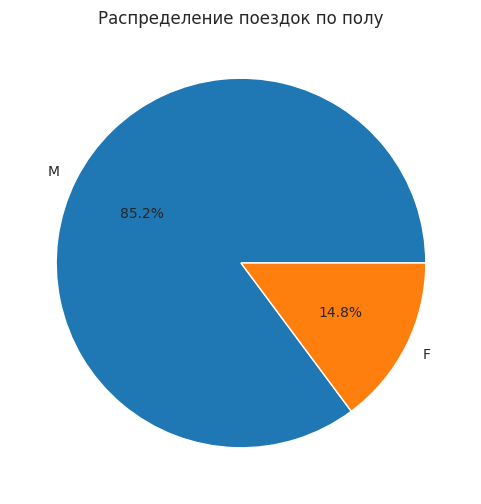

In [68]:
gender_counts = df['gender_cd'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Распределение поездок по полу')
plt.show()

# Анализ по моделям самоката

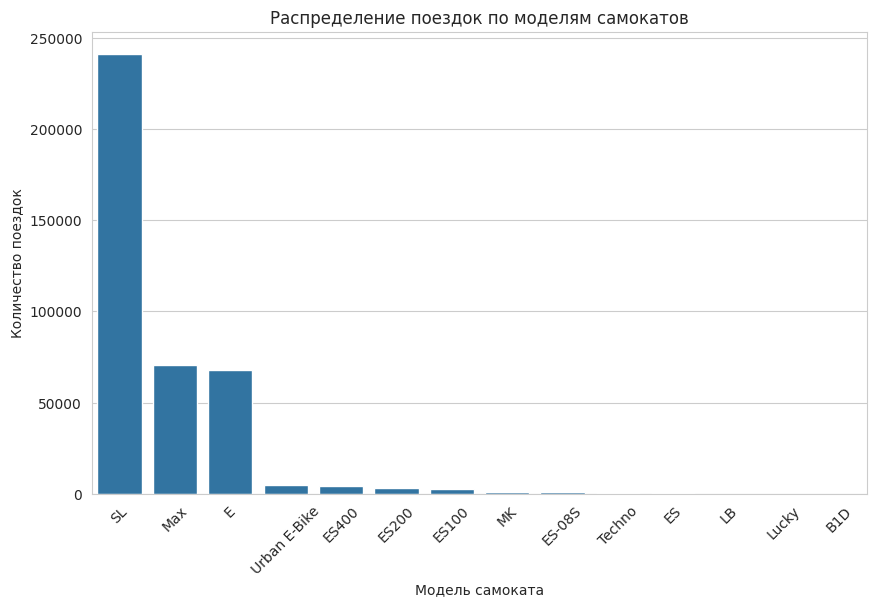

In [69]:
model_counts = df['transport_model'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.title('Распределение поездок по моделям самокатов')
plt.xlabel('Модель самоката')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

## Анализ по регионам

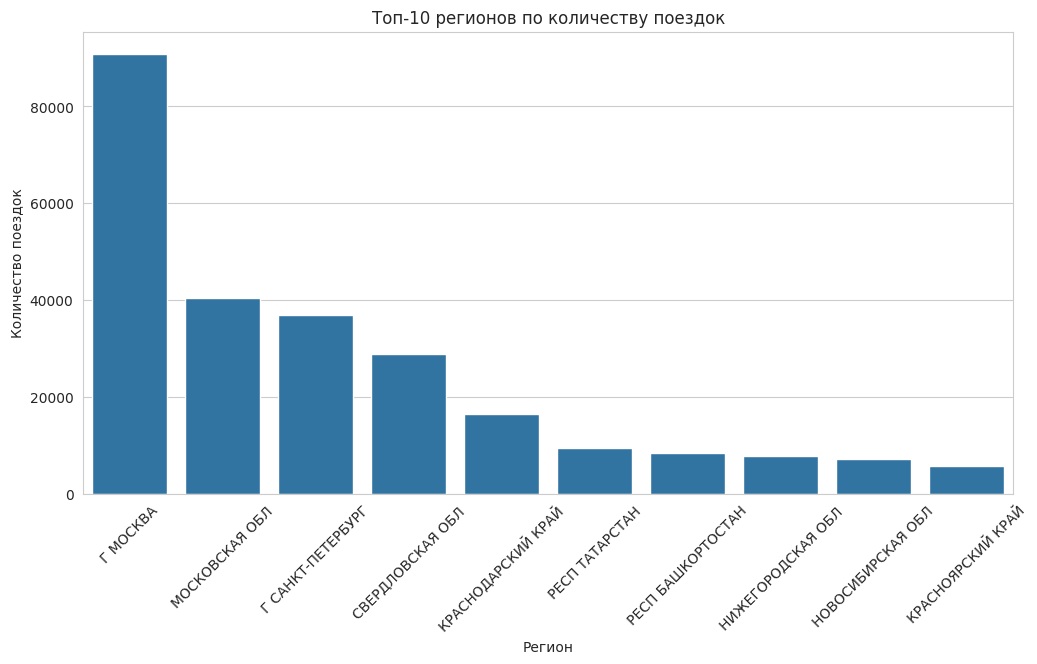

In [70]:
top_regions = df['lvn_state_nm'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Топ-10 регионов по количеству поездок')
plt.xlabel('Регион')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.show()

# Анализ кэшбэка

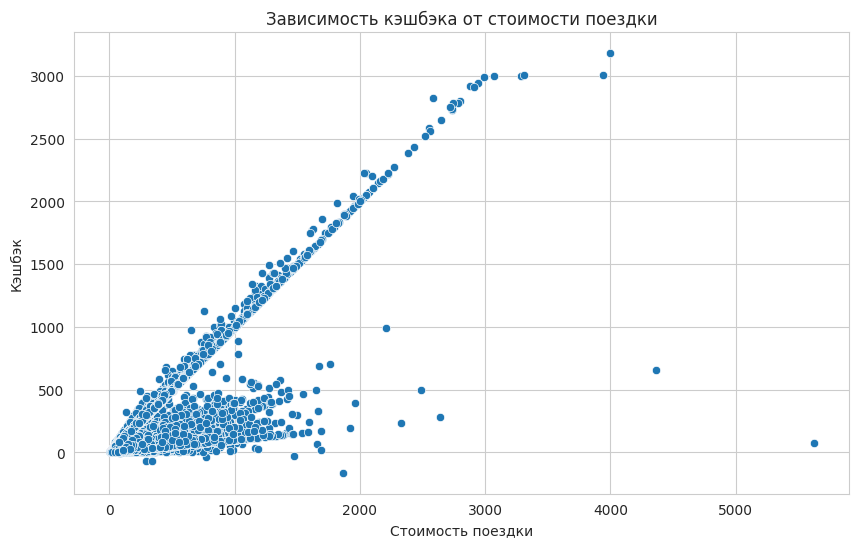

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='nominal_price_rub_amt', y='loyalty_accrual_rub_amt', data=df)
plt.title('Зависимость кэшбэка от стоимости поездки')
plt.xlabel('Стоимость поездки')
plt.ylabel('Кэшбэк')
plt.show()

In [72]:
df['start_hour'] = pd.to_datetime(df['local_book_start_dttm']).dt.hour


<ipython-input-73-2bc00def633c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='start_hour', data=df, palette='viridis')


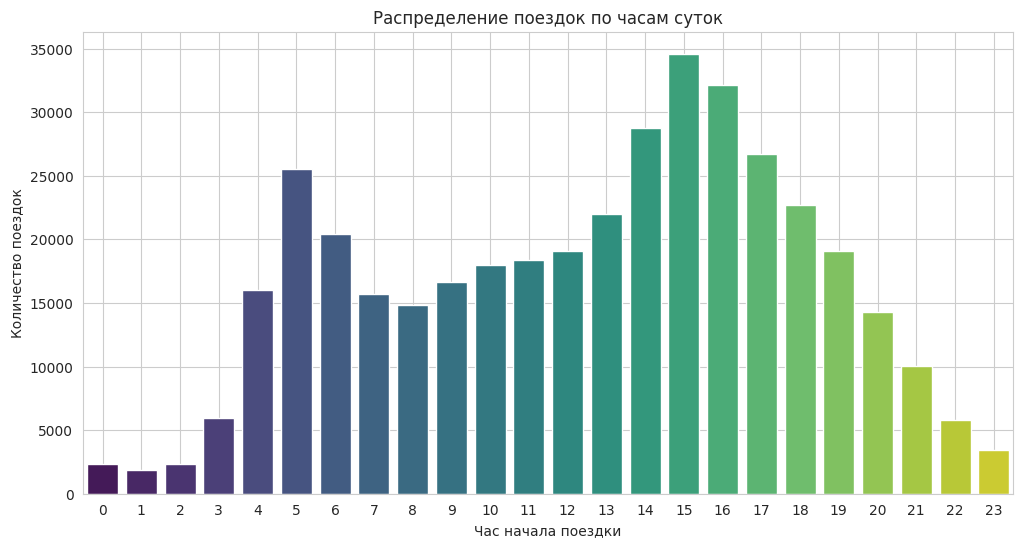

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x='start_hour', data=df, palette='viridis')
plt.title('Распределение поездок по часам суток')
plt.xlabel('Час начала поездки')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

Анализ по семейному статусу

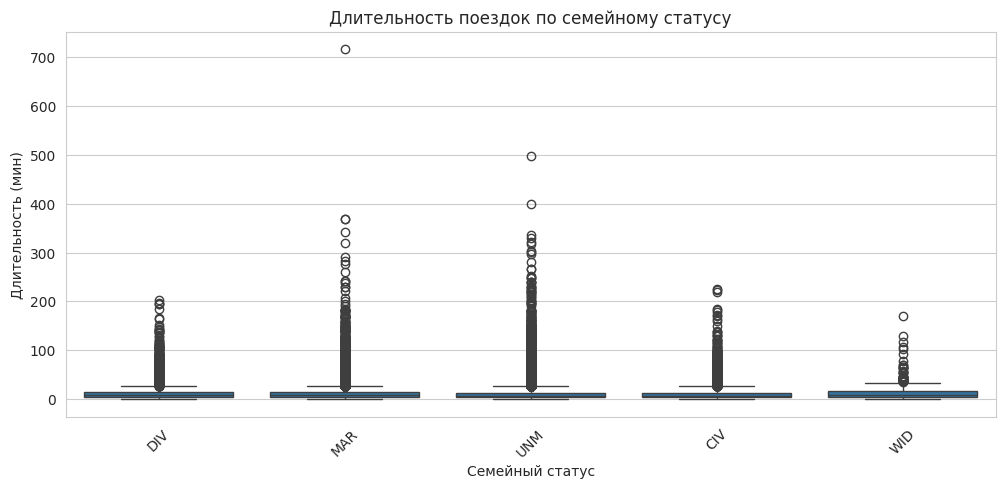

In [74]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='marital_status_cd', y='duration_min')
plt.title('Длительность поездок по семейному статусу')
plt.xlabel('Семейный статус')
plt.ylabel('Длительность (мин)')
plt.xticks(rotation=45)
plt.show()